<a href="https://colab.research.google.com/github/cactus1386/NationalCard-ImageProccessing/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import Libraries

In [2]:
! pip install ultralytics easyocr

  Using cached ultralytics-8.3.74-py3-none-any.whl.metadata (35 kB)
  Using cached easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached python_bidi-0.6.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached pyclipper-1.3.0.post6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.0 kB)
  Using cached ninja-1.11.1.3-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.3 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.w

In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Set model and path

In [4]:
model = YOLO('TextDetection.pt') # set yolo model
img_path = '14.jpg' # set image path
ocr = easyocr.Reader(['fa']) # set persian ocr reader

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

# Make function for crop and read text parts

In [8]:
def process_img(path):
    img = cv2.imread(path) # read image

    results = model(img) # set model for image
    for result in results:
        boxes = result.boxes
        for box in boxes:
            xyxy = box.xyxy[0]
            x1, y1, x2, y2 = map(int, xyxy.tolist()) # convert to int and set x and y

            # crop image and show that
            cropped_img = img[y1:y2, x1:x2]
            cv2_imshow(cropped_img)
            # set ocr and read text on the cropped image
            ocr_result = ocr.readtext(cropped_img)

            # OCR result
            for (bbox, text, conf) in ocr_result:
                # if conf > 0.3:  # set confidence
              print(f"Text: {text}, Confidence: {conf}")

              # draw box
              cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2_imshow(img)

# Call function and use it


0: 640x288 2 Births, 1 Expire, 1 FatherName, 1 LastName, 1 Name, 1 National, 344.5ms
Speed: 4.4ms preprocess, 344.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 288)


Text: ٤٠٣/٠٧/٢, Confidence: 0.2911829465079598


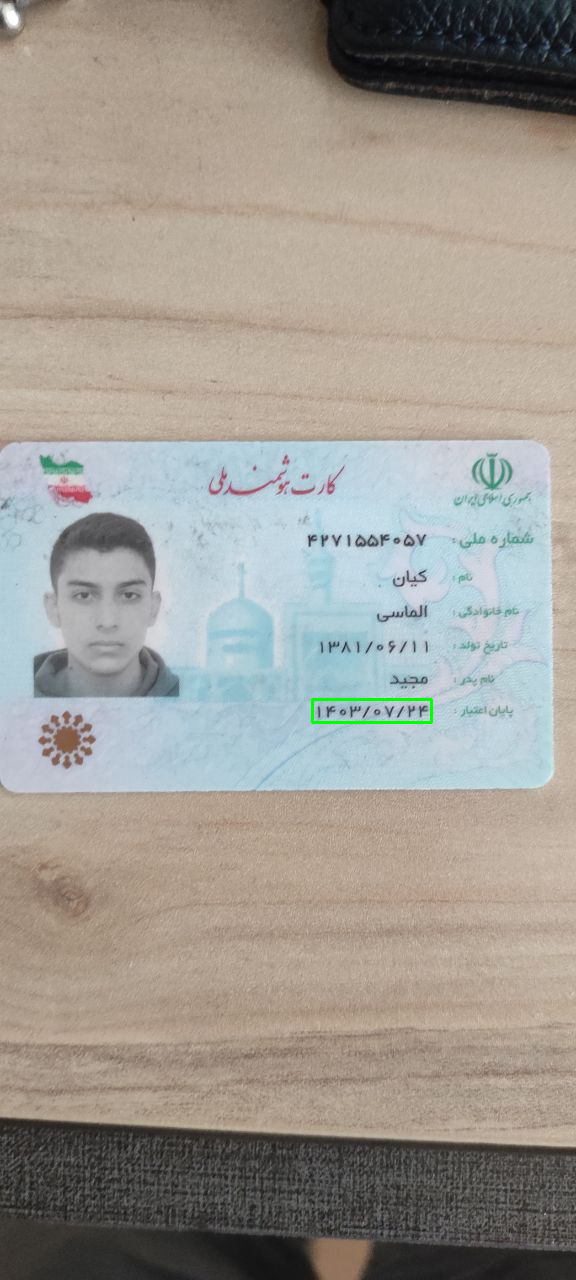

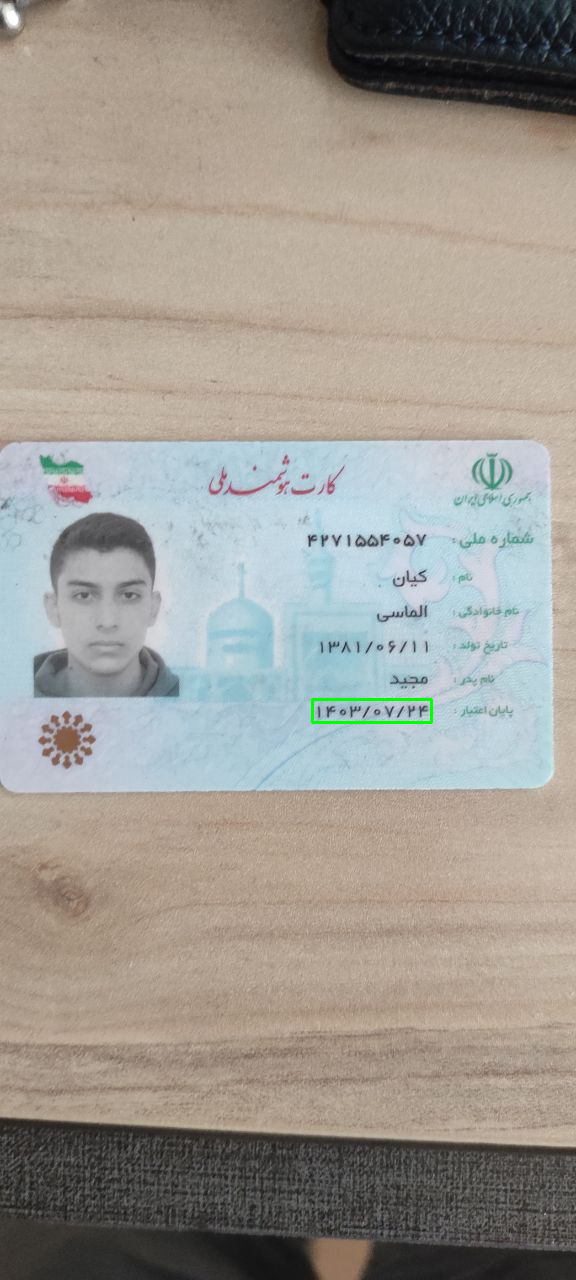

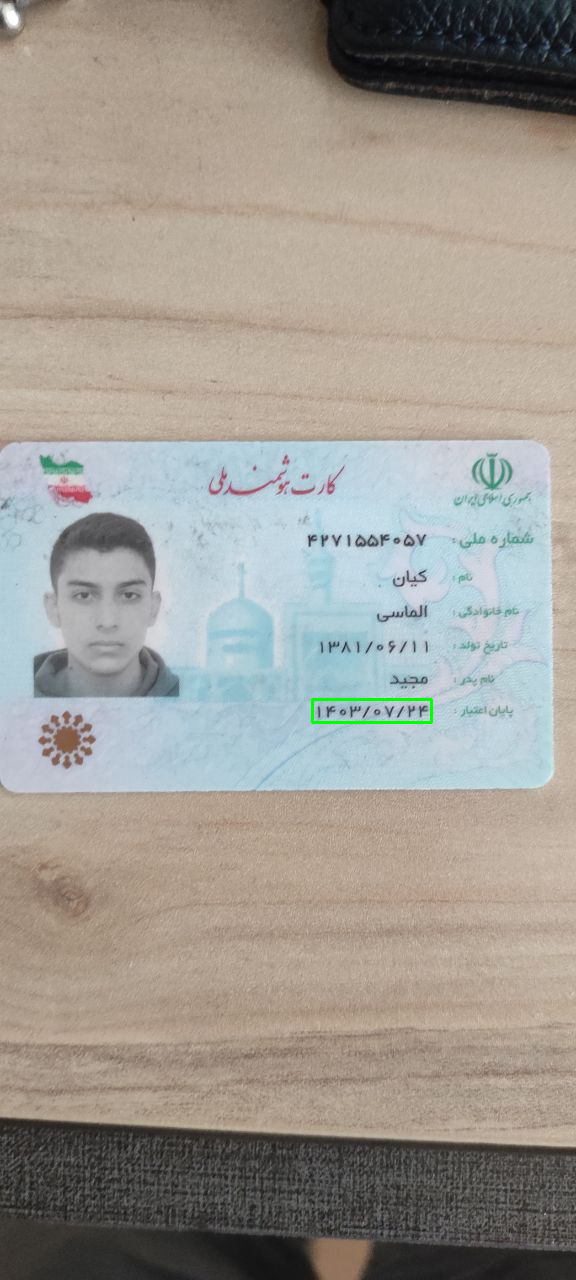

Text: ٤٢٧١٥٥٤٠٥٧, Confidence: 0.838145682038517


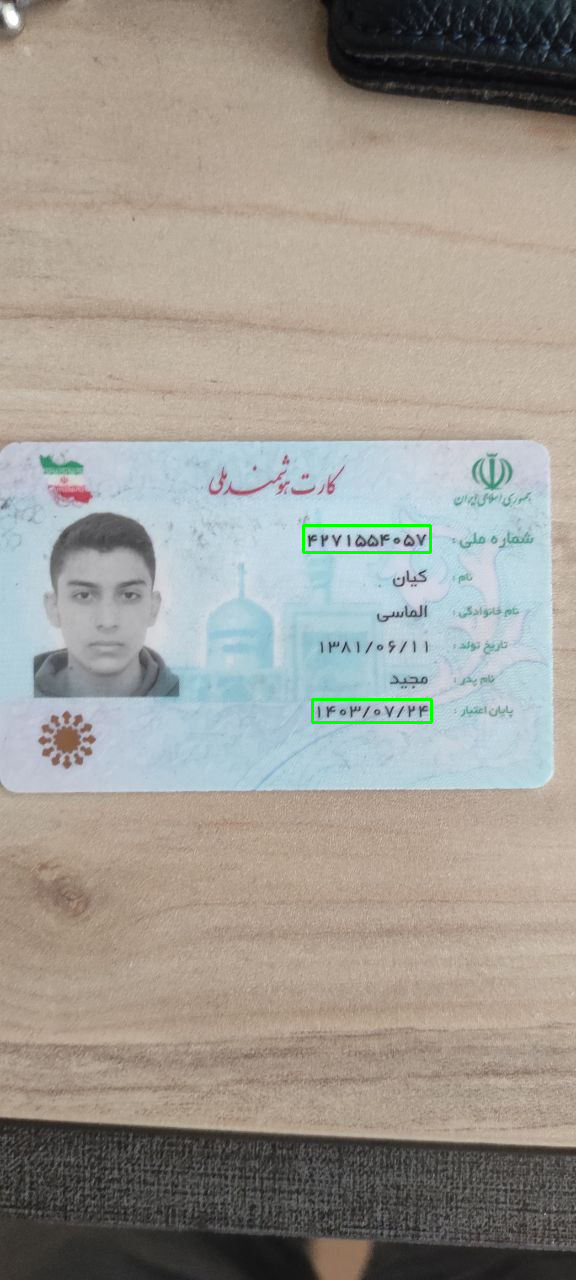

Text: /0, Confidence: 0.7675821734694227


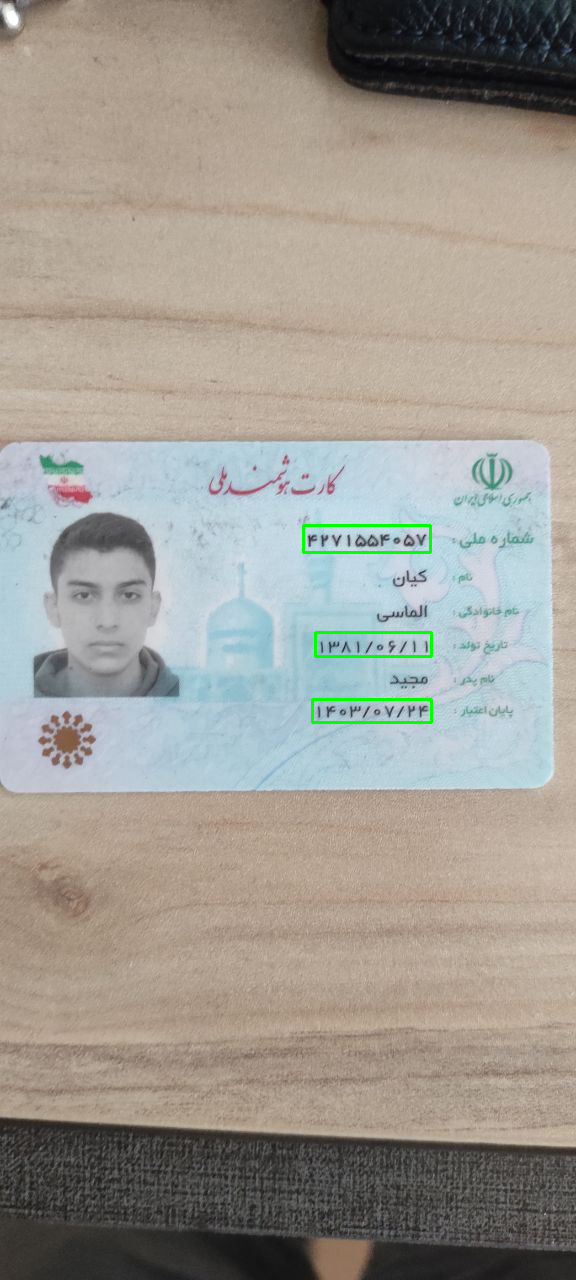

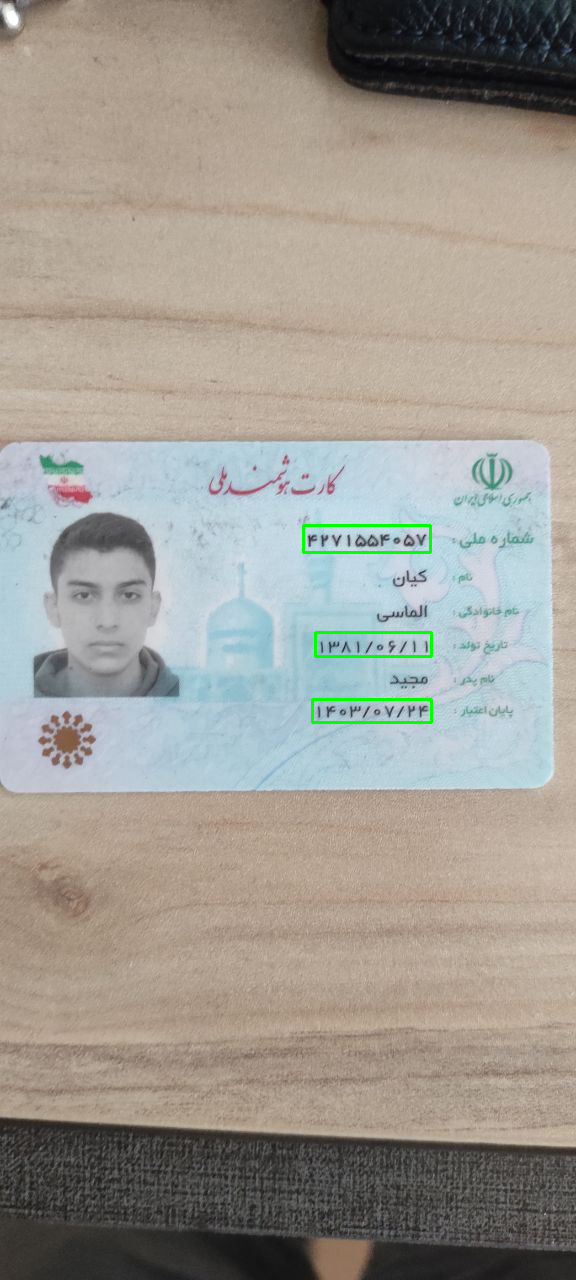

Text: ١ /٠٢/ ٢٨١, Confidence: 0.11025579076857513


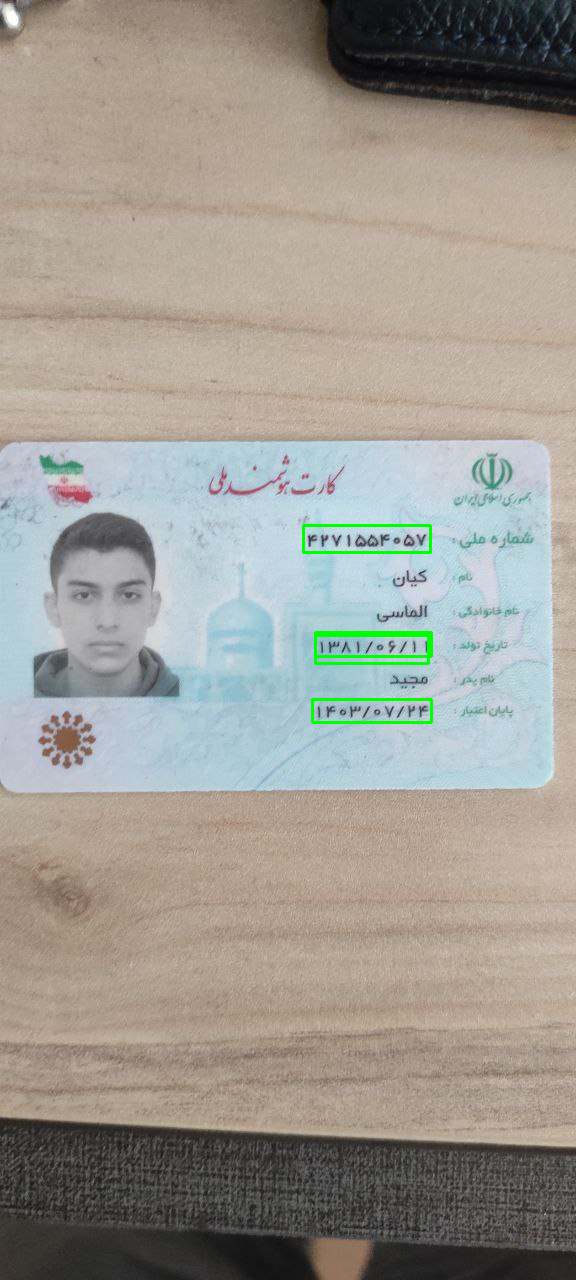

In [9]:
process_img(img_path)